In [132]:
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.impute import MissingIndicator, SimpleImputer

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectFromModel

# plot_confusion_matrix is a handy visual tool, added in the latest version of scikit-learn
# if you are running an older version, comment out this line and just use confusion_matrix
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve

sub_format = pd.read_csv('../data/SubmissionFormat (1).csv')
test = pd.read_csv('../data/test.csv')
labels = pd.read_csv('../data/labels.csv')
train = pd.read_csv('../data/trainingvalues.csv')

In [133]:
sub_format.head(2)

,id,status_group
0,50785,predicted label
1,51630,predicted label


In [134]:
test.head(2)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe


In [135]:
labels.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [136]:
labels['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [137]:
train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [138]:
train['waterpoint_type'].value_counts()

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

In [139]:
train['waterpoint_type_group'].value_counts()

communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64

In [140]:
train['source_class'].value_counts()

groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64

In [141]:
train['source'].value_counts()

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

In [143]:
train.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [144]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [145]:
labels.replace(to_replace='functional needs repair', value='functional', inplace=True)
labels.drop(['id'], axis=1, inplace=True)

In [146]:
labels['status_group'].value_counts()

functional        36576
non functional    22824
Name: status_group, dtype: int64

In [147]:
 train.drop(['id', 'date_recorded', 'funder', 'wpt_name', 'subvillage', 'lga', 'ward', 'public_meeting', 'recorded_by', 
             'scheme_name', 'permit', 'extraction_type_group', 'extraction_type_class', 'management', 'management_group',
             'payment', 'payment_type', 'quality_group', 'quantity_group', 'source_type', 'source_class', 'waterpoint_type_group'],
             axis=1, inplace=True)

In [148]:
X = train
y = labels
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [149]:
dummy_model = DummyClassifier(strategy="most_frequent")

In [150]:
dummy_model.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

In [151]:
dummy_model.predict(X_train)[:50]

array(['functional', 'functional', 'functional', 'functional',
       'functional', 'functional', 'functional', 'functional',
       'functional', 'functional', 'functional', 'functional',
       'functional', 'functional', 'functional', 'functional',
       'functional', 'functional', 'functional', 'functional',
       'functional', 'functional', 'functional', 'functional',
       'functional', 'functional', 'functional', 'functional',
       'functional', 'functional', 'functional', 'functional',
       'functional', 'functional', 'functional', 'functional',
       'functional', 'functional', 'functional', 'functional',
       'functional', 'functional', 'functional', 'functional',
       'functional', 'functional', 'functional', 'functional',
       'functional', 'functional'], dtype='<U10')

In [152]:
cv_results = cross_val_score(dummy_model, X_train, y_train, cv=5)
cv_results.mean()

0.617912457912458

In [153]:
class ModelWithCV():
    '''Structure to save the model and more easily see its crossvalidation'''
    
    def __init__(self, model, model_name, X, y, cv_now=True, scoring=None):
        self.model = model
        self.name = model_name
        self.X = X
        self.y = y
        # For CV results
        self.scoring = scoring
        self.cv_results = None
        self.cv_mean = None
        self.cv_median = None
        self.cv_std = None
        #
        if cv_now:
            self.cross_validate()
        
    def cross_validate(self, X=None, y=None, kfolds=5):
        '''
        Perform cross-validation and return results.
        
        Args: 
          X:
            Optional; Training data to perform CV on. Otherwise use X from object
          y:
            Optional; Training data to perform CV on. Otherwise use y from object
          kfolds:
            Optional; Number of folds for CV (default is 10)  
        '''
        
        cv_X = X if X else self.X
        cv_y = y if y else self.y

        
        self.cv_results = cross_val_score(self.model, cv_X, cv_y, cv=kfolds, scoring=self.scoring)
        self.cv_mean = np.mean(self.cv_results)
        self.cv_median = np.median(self.cv_results)
        self.cv_std = np.std(self.cv_results)
        
        

        
    def print_cv_summary(self):
        cv_summary = (
        f'''CV Results for `{self.name}` model:
            {self.cv_mean:.5f} ± {self.cv_std:.5f} accuracy
        ''')
        print(cv_summary)

        
    def plot_cv(self, ax):
        '''
        Plot the cross-validation values using the array of results and given 
        Axis for plotting.
        '''
        ax.set_title(f'CV Results for `{self.name}` Model')
        # Thinner violinplot with higher bw
        sns.violinplot(y=self.cv_results, ax=ax, bw=.4)
        sns.swarmplot(
                y=self.cv_results,
                color='orange',
                size=10,
                alpha= 0.8,
                ax=ax
        )

        return ax

In [154]:
dummy_model_results = ModelWithCV(
                        model=dummy_model,
                        model_name='dummy',
                        X=X_train, 
                        y=y_train
)

CV Results for `dummy` model:
            0.61791 ± 0.00005 accuracy
        


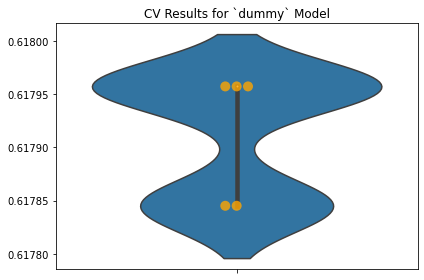

In [155]:
fig, ax = plt.subplots()

ax = dummy_model_results.plot_cv(ax)
plt.tight_layout();

dummy_model_results.print_cv_summary()

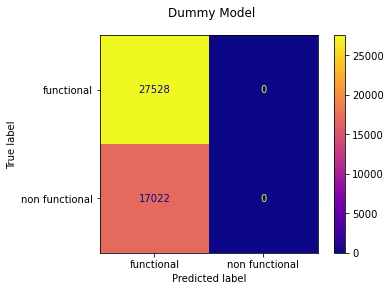

In [156]:
fig, ax = plt.subplots()

fig.suptitle("Dummy Model")

plot_confusion_matrix(dummy_model, X_train, y_train, ax=ax, cmap="plasma");

In [157]:
# just the numbers (this should work even with older scikit-learn)
confusion_matrix(y_train, dummy_model.predict(X_train))

array([[27528,     0],
       [17022,     0]], dtype=int64)

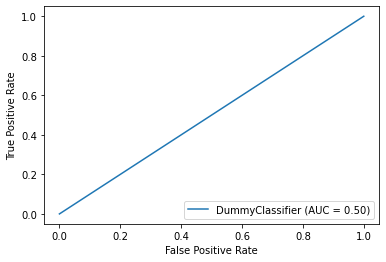

In [158]:
plot_roc_curve(dummy_model, X_train, y_train);

In [159]:
train['installer'].unique()

array(['Roman', 'GRUMETI', 'World vision', ..., 'Dina', 'brown',
       'SELEPTA'], dtype=object)

In [160]:
install = len(train.loc[train['installer'] > '900' ])
install


54965

In [161]:
train['installer'].value_counts(normalize=True) * 100

DWE                      31.217150
Government                3.273836
RWE                       2.163423
Commu                     1.901516
DANIDA                    1.883577
                           ...    
Usambala sisters          0.001794
Christopher               0.001794
Shelisheli commission     0.001794
Ng'omango                 0.001794
Okong'o                   0.001794
Name: installer, Length: 2145, dtype: float64

In [166]:
subpipe_num = Pipeline(steps=[('num_impute', SimpleImputer()),
                           ('ss', StandardScaler())])
subpipe_cat = Pipeline(steps=[('cat_impute', SimpleImputer(strategy='most_frequent')),
                             ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'))])

In [170]:
CT = ColumnTransformer(transformers=[('subpipe_num', subpipe_num, ['amount_tsh', 'gps_height', 'longitude',
                                                                   'latitude', 'region_code', 'district_code',
                                                                   'construction_year']),
                                     ('subpipe_cat', subpipe_cat, ['installer', 'basin', 'region',
                                                                      'scheme_management', 'extraction_type',
                                                                      'water_quality', 'quantity', 'source',
                                                                      'waterpoint_type'])],
                                     remainder='passthrough', sparse_threshold=0)

In [175]:
CT.fit_transform(X_train).shape

(44550, 1961)

In [176]:
CT.transform(X_test).shape

(14850, 1961)

In [177]:
logreg_model_pipe = Pipeline(steps=[('ct', CT),
                            ('logreg', LogisticRegression(random_state=42))])

In [178]:
logreg_model_pipe.fit(X_train, y_train)

C:\Users\stefano caruso\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\stefano caruso\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('subpipe_num',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer()),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  ['amount_tsh', 'gps_height',
                                                   'longitude', 'latitude',
                                                   'region_code',
                                                   'district_code',
                                                   'construction_year']),
                                                 ('subpipe_cat',
                                                  Pipeline(steps=[('cat_imput

In [179]:
logreg_model_pipe.score(X_train, y_train)

0.7739842873176207

In [180]:
log_pipe2 = log_pipe = Pipeline(steps=[('ct', CT), 
                           ('logreg', LogisticRegression(random_state=42, penalty='none',
                                                         max_iter = 1000))])

log_pipe2.fit(X_train, y_train)

C:\Users\stefano caruso\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\stefano caruso\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('subpipe_num',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer()),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  ['amount_tsh', 'gps_height',
                                                   'longitude', 'latitude',
                                                   'region_code',
                                                   'district_code',
                                                   'construction_year']),
                                                 ('subpipe_cat',
                                                  Pipeline(steps=[('cat_imput

In [182]:
log_pipe2.score(X_train, y_train)

0.8008754208754209

In [190]:
log_pipe3 = Pipeline(steps=[('ct', CT), 
                           ('logreg', LogisticRegression(random_state=42, penalty='none', 
                                                         tol=25))])
                             
log_pipe3.fit(X_train, y_train)

C:\Users\stefano caruso\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\stefano caruso\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('subpipe_num',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer()),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  ['amount_tsh', 'gps_height',
                                                   'longitude', 'latitude',
                                                   'region_code',
                                                   'district_code',
                                                   'construction_year']),
                                                 ('subpipe_cat',
                                                  Pipeline(steps=[('cat_imput

In [192]:
log_pipe3.score(X_train, y_train)

0.7774635241301908

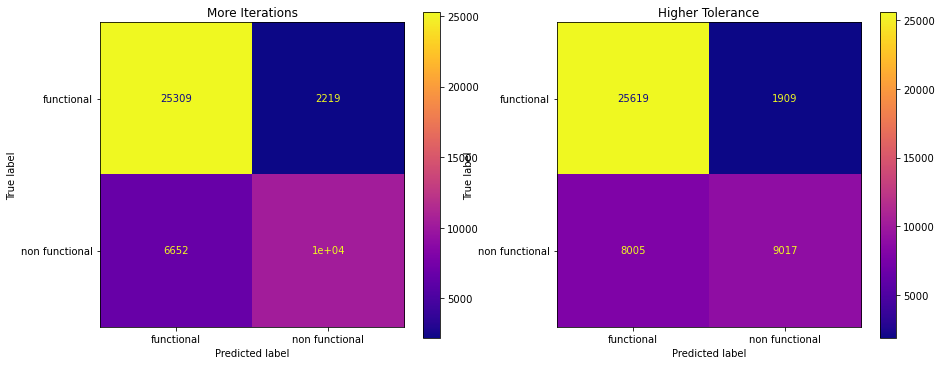

In [193]:
fix, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

axes[0].set_title("More Iterations")
axes[1].set_title("Higher Tolerance")

plot_confusion_matrix(log_pipe2, X_train, y_train,
                      ax=axes[0], cmap="plasma")
plot_confusion_matrix(log_pipe3, X_train, y_train,
                      ax=axes[1], cmap="plasma");